# Robotersimulation

Mit dieser Robotersimulation können Sie beliebige Roboter in matplotlib darstellen. Sie können generierte oder manuell eingetragene Gelenkwinkelpositionen anzeigen lassen, den Roboter manuell über die Gelenkwinkel steuern, Trajektorien abfahren lassen oder die DH-Transformation manuell durchführen. 

Um einen Roboter zu simulieren muss zunächst einer erstellt werden, dazu importieren Sie die dafür benötigte Klasse:

In [1]:
from src.robot import Robot

Roboter können auf entweder über ihre DH-Parameter und Gelenkwinkelgrenzen erstellt werden oder man nutzt die vordefinierten Roboter YouBot und Baxter, indem `name='youbot'` oder `name='baxter'` übergeben werden.

Die Erstellung über selbst bestimmte DH-Parameter könnte beispielsweise so aussehen.

```python
import numpy as np

dh_theta_values = np.array([np.pi / 2, np.pi / 2, 0, np.pi / 2, np.pi / 2])
dh_alpha_values = np.array([-np.pi / 2, 0, 0, np.pi / 2, -np.pi / 2])
dh_a_values = np.array([0.093, 0.25, 0.875, 0.2, 0.2])
dh_d_values = np.array([0.425, 0.2, 0, 0.089, 0.18])

dh_values = [dh_theta_values, dh_d_values, dh_a_values, dh_alpha_values]

a1 = [120, -120]
a2 = [80, -65]
a3 = [140, -140]
a4 = [90.5, -90.5]
a5 = [130.5, -167.5]

joint_limits = [a1, a2, a3, a4, a5]

custom_robot = Robot(dh_values=dh_values, joint_limits=joint_limits)
```

#### Wir erstellen aber nun einen YouBot über den Namen:

In [2]:
youbot = Robot(robot='twoaxis')

Um den so erstellten Roboter in matplotlib anzuzeigen müssen Sie eine `RobotAnimation` anlegen. Bei Erstellung dieses Objektes übergeben Sie den gerade erstellten Roboter, Sie können über `basis=True|False` einstellen ob die Ausrichtung der Gelenkwinkel dargestellt werden soll. In dieser Klasse `RobotAnimation` stehen Ihnen die folgenden Funktionen zur Verfügung:

```python
# Plottet den Roboter mit den übergebenen Gelenkwinkelstellungen @q_array
def draw_robot(q_array)

# Plottet den Roboter und ein eventuell übergebenes Ziel @goal. Der Roboter kann manuell über Slider bewegt werden
def manual_control(goal=None)

# Plottet eine Trajektorie aus einem übergebenen Vektor @trajectory aus Gelenkwinkelstellungen
def draw_trajectory_robot(trajectory)

# Plottet den Roboter und lässt den User manuell die DH-Transformation durchzuführen
def dh_animation()
```

Wir erstellen eine `RobotAnimation` und übergeben die Gelenkwinkelstellungen für die Kerze. Um sich den interaktiven Plot anzeigen zu lassen müssen Sie in jeder Zelle wo Sie dies tun wollen das matplotlib Backend mit `%matplotlib notebook` einbinden.

Testen Sie andere Gelenkwinkelstellungen für den Roboter aus. Achten Sie auf die Gelenkwinkelgrenzen des Roboters.
Falls Sie sich nicht mehr sicher sein sollten, können Sie diese mit `youbot.joint_limits` erfragen.

In [3]:
%matplotlib widget

from src.robot_animation import RobotAnimation

joint_pos = [0,0,0,0,0]
ani0 = RobotAnimation(youbot, basis=False)
ani0.draw_robot(joint_pos)

/home/nex/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/nex/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

Wenn Sie eine neue Animation anzeigen lassen wollen erstellen Sie dazu ein neues Objekt. Sie können auch das Alte verwenden, die Animation wird dann allerdings in der Zelle ausgeführt in der Sie das alte Objekt zum ersten mal animiert haben.

Hier ist ein Beispiel, wie Sie eine manuelle Steuerung Ihres Roboters durchführen können.

IntSlider(value=0, description='q1 [°]', max=169, min=-169)

IntSlider(value=35, description='q2 [°]', max=110, min=-75)

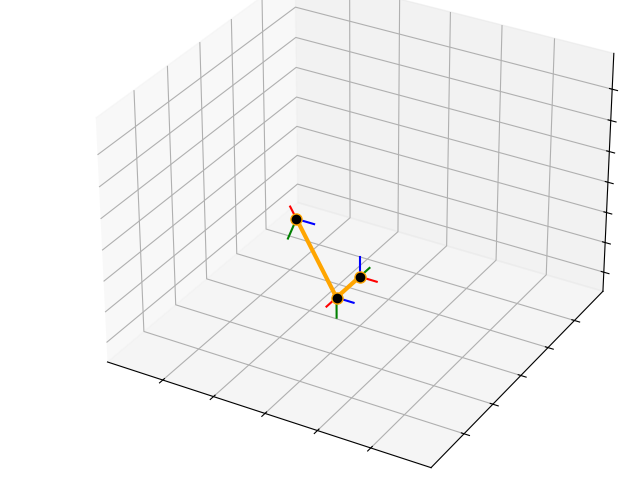

In [4]:
%matplotlib widget

ani1 = RobotAnimation(youbot)
ani1.manual_control()

Sie können auch ein Ziel übergeben. Dazu können Sie beispielsweise Daten für Ihren Roboter generieren. Importieren Sie dazu den DataHandler und generieren eine `goal_pos` die Sie als Ziel übergeben. Bei der Generierung der Datenpunkte wird bereits berücksichtigt, dass der von Ihnen erstellte Roboter diese auch erreichen kann.

Versuchen Sie nun den Roboter manuell zum generierten Ziel zu bewegen.

In [5]:
from src.datahandler import DataHandler

datahandler = DataHandler(youbot)
datahandler.set_torch(True)
tcp, joint_pos = datahandler(1000, normalize=False)
tcp = tcp.cpu().numpy()
datahandler.set_torch(False)

IntSlider(value=0, description='q1 [°]', max=169, min=-169)

IntSlider(value=35, description='q2 [°]', max=110, min=-75)

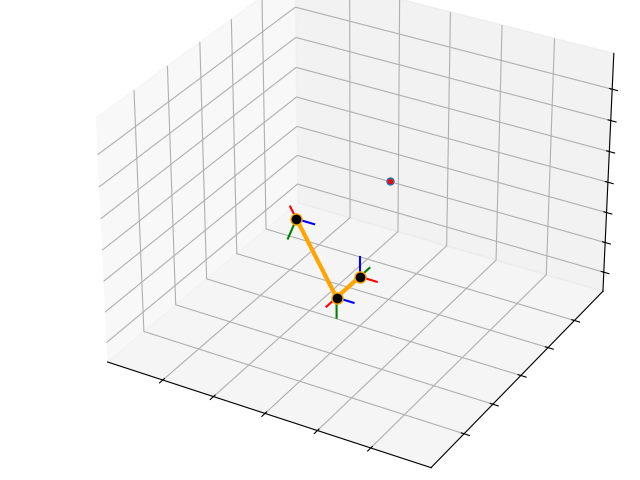

In [6]:
%matplotlib widget

ani1 = RobotAnimation(youbot)
ani1.manual_control(tcp[1][3::4])

Um eine Trajektorie abzufahren müssen sie Gelenkwinkelpositionen generieren. Dazu könnten sie beispielsweise von einem Startpunkt ausgehen und sukzessive einen(oder mehrere) Gelenkwinkel inkrementieren und diese einem numpy array übergeben. Achten Sie darauf, dass Sie die Gelenkwinkelgrenzen des Roboters nicht überschreiten. Diese können Sie sich über die Klassenvariable `joint_limits` ausgeben lassen.

Versuchen Sie den Roboter eine eigene Trajektorie fahren zu lassen.

In [7]:
import numpy as np

start = np.array([169, 0, -20, -30, 0])
trajectory = []
trajectory.append(start)
for i in range(27):
    start = np.copy(start)
    if(start[0]-13) >= youbot.joint_limits[0][1]:
        start[0] += -13
    trajectory.append(start)

trajectory = np.radians(np.asarray(trajectory))

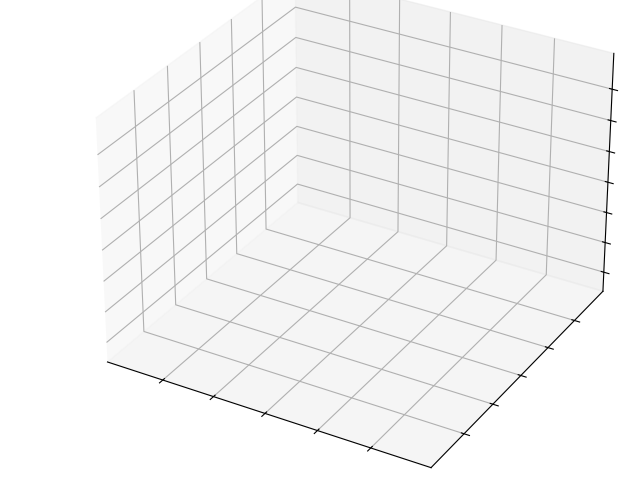

In [8]:
%matplotlib widget

ani2 = RobotAnimation(youbot)
ani2.draw_trajectory_robot(trajectory)

Mit der Robotersimulation können Sie die DH Transformation visuell nachvollziehen. Sie starten im ersten Gelenk und drehen das Koordinatensystem ins nächste Gelenk. Benutzen Sie dafür die Slider Rot $\theta$ Trans d Trans a Rot $\alpha$. Achten Sie darauf die DH-Transformation nach Konvention zu nutzen.

Für die Genauigkeit gilt:
- Bei der Rotation müssen sie Gradgenau sein. Wenn die DH-Parameter 90° fordern, wird erst ein Wert ab der Genauigkeit von 89,99° akzeptiert.
- Bei der Translation können sie um einen Millimeter abweichen.

Haben Sie den Winkel mit den korrekten Parametern ins Gelenk gedreht wird Ihnen im Plot eine Meldung angezeigt. Nutzen Sie erst dann den obersten Slider um ins nächste Gelenk zu wechseln.

Führen Sie jetzt die DH-Transformation für den YouBot durch und tragen Sie die herausgefundenen Parameter in die untenstehende Tabelle ein.

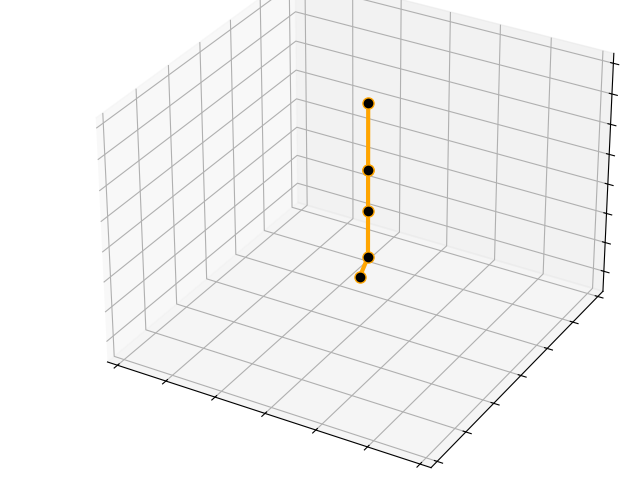

IntSlider(value=1, description='Gelenk', max=5, min=1)

BoundedFloatText(value=0.0, description='Rot θ [°]', max=180.0, min=-180.0, step=1.0)

BoundedFloatText(value=0.0, description='Trans d [m]', max=1.5707963267948966, step=0.01)

BoundedFloatText(value=0.0, description='Trans a [m]', max=1.5707963267948966, step=0.01)

BoundedFloatText(value=0.0, description='Rot α [°]', max=180.0, min=-180.0, step=1.0)

In [14]:
%matplotlib widget

ani3 = RobotAnimation(youbot)
ani3.dh_animation()

Ihre ausgerechneten Parameter können Sie in diese Tabelle eintragen.

#### DH-Parametertabelle youBot

$\begin{array}{rr} \hline
\mathbf{Gelenk} &\mathbf{\theta} &\mathbf{d} &\mathbf{a} &\mathbf{\alpha} \\ \hline
\mathbf{1} & & & & \\ \hline
\mathbf{2} & & & & \\ \hline
\mathbf{3} & & & & \\ \hline
\mathbf{4} & & & & \\ \hline
\mathbf{5} & & & & \\ \hline
\end{array}$
